In [1]:
import json

import folium
from folium.features import GeoJson
# from folium.plugins import BeautifyIcon
# from folium.features import CustomIcon

In [53]:
import json
import re
from urllib import request

# get connpass event id list
URL = "https://www.pycon.jp/support/bootcamp.html"
with request.urlopen(URL) as f:
    html = f.read().decode("utf-8")
pattern = re.compile(r"pyconjp.*/event/(\d+)/(?!.*中止)")
ids = ",".join(m[1] for m in pattern.finditer(html))

# get event info via connnpass API
connpass_api = "https://connpass.com/api/v1/event/"
url = f"{connpass_api}?event_id={ids}&count=100"
with request.urlopen(url) as f:
    data = json.loads(f.read())

In [97]:
# generate geoJSON
geojson = {
    "type": "FeatureCollection",
    "features": [{
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [float(e["lon"]), float(e["lat"])],
        },
        "properties": {
            "name": e["title"],
            "url": e["event_url"],
            "date": e["started_at"].split("T")[0],
        },
    } for e in data["events"]]
}
with open("pycamp.geojson", "w") as f:
    json.dump(geojson, f, indent=2, ensure_ascii=False)
geojson["features"][:3]

[{'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [139.063178, 37.910552]},
  'properties': {'name': 'Python Boot Camp in 新潟2nd',
   'url': 'https://pyconjp.connpass.com/event/255600/',
   'date': '2022-09-17'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [139.8053149, 36.3126885]},
  'properties': {'name': 'Python Boot Camp in 栃木小山',
   'url': 'https://pyconjp.connpass.com/event/47757/',
   'date': '2017-02-11'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [140.8770981, 38.2640004]},
  'properties': {'name': 'Python Boot Camp in 仙台',
   'url': 'https://pyconjp.connpass.com/event/104080/',
   'date': '2018-12-08'}}]

In [88]:
lon, lat = 138.554, 36.756
zoom_start = 5
map = folium.Map(location=[lat, lon], tiles='Cartodb Positron', zoom_start=zoom_start)

# https://glyphsearch.com/?library=glyphicons
GeoJson(geojson).add_to(map)

map


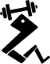
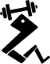
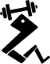
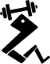
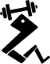
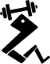
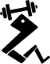
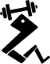
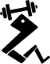
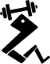
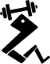
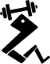
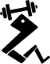
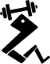
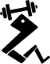
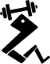
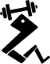
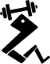
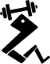
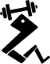
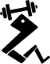
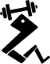
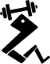
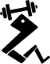
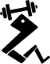
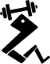
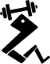
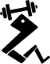
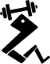
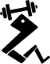
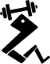
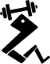
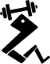
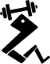
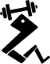
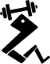
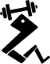
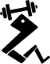
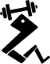
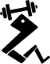
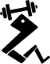
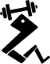
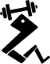
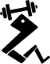
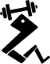

In [8]:
lon, lat = 138.554, 36.756
zoom_start = 5
map = folium.Map(location=[lat, lon], tiles='Cartodb Positron', zoom_start=zoom_start)

for feature in data["features"]:
    icon = CustomIcon(
       icon_image = './pycamp-small.png',
       icon_size = (20, 25),
       icon_anchor = (10, 12),
       popup_anchor = (3, 3),
    )
    lat, lng = feature["geometry"]["coordinates"]
    # print(lat, lng)
    folium.Marker(
        location=[lng, lat],
        icon=icon,
    ).add_to(map)

map.save("pycamp.html")
map